In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import numpy as np
#import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_extraction.text import *

#from ggplot import diamonds

plt.style.use('ggplot')  
%matplotlib inline

C:\Users\I822363\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\I822363\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#trainFile = "C://Users//sagar//Documents//MIDS//W207//train.csv"
trainFile = os.getcwd() + "//train.csv"
trainFile

'C:\\Users\\I822363\\Documents\\MIDS\\W207\\Fall2017-Section3-master\\Projects//train.csv'

# Load data and basic EDA

In [3]:
train_df = pd.read_csv(trainFile)
train_df.shape

(595212, 59)

In [4]:
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's remobve unwanted columns

In [5]:
#Drop unnecessary columns
train_df.drop('id',axis=1,inplace=True)
train_df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
X = train_df.copy(deep=True)
y = X.pop('target')

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=99)


In [7]:
train_df.isnull().any().any()
#train_df.columns[train_df.isnull().any()].tolist()

False

No Null values, which is great!!

Let's check for missing values and short list columns with missing entries

In [8]:
value_list = [-1]
missing_val_cols = train_df.columns[train_df.isin(value_list).any()].tolist()
train_df[missing_val_cols].head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_05_cat,ps_car_07_cat,ps_car_09_cat,ps_car_11,ps_car_12,ps_car_14
0,2,1,0,0.718070,10,1,-1,1,1,0,2,0.400000,0.370810
1,1,0,0,0.766078,11,1,-1,-1,1,2,3,0.316228,0.388716
2,4,1,0,-1.000000,7,1,-1,-1,1,2,1,0.316228,0.347275
3,1,0,0,0.580948,7,1,0,1,1,3,1,0.374166,0.294958
4,2,1,0,0.840759,11,1,-1,-1,1,2,3,0.316070,0.365103


In [9]:
#train_df.apply(lambda x: sum(x.isin(value_list).values), axis = 0)
#(train_df['ps_ind_04_cat'] == -1).sum()
print((X['ps_reg_03'] == -1).sum())

107772


In [10]:
# Build subset dataframe of missing value columns
missing_val_summary = pd.DataFrame(
    data = train_df[missing_val_cols].apply(
        lambda x: round(100 * (x == -1).mean(),5), axis=0),
                        columns =['Percentage'])

# visualize the columns having missing values
missing_val_summary.sort_values('Percentage', ascending = False)

,Percentage
ps_car_03_cat,69.08984
ps_car_05_cat,44.78253
ps_reg_03,18.10649
ps_car_14,7.16047
ps_car_07_cat,1.93024
ps_ind_05_cat,0.97595
ps_car_09_cat,0.09560
ps_ind_02_cat,0.03629
ps_car_01_cat,0.01798
ps_ind_04_cat,0.01394


Clearly from the above table, the first 3 entries may not be suitable for prediction. 

Let's check the correlation

Let's do a count plot of the target variable to show the distribution

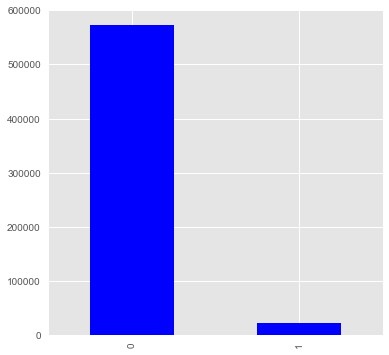

0    573518
1     21694
Name: target, dtype: int64

In [11]:

train_df['target'].value_counts().plot(
                                        kind = 'bar', 
                                        figsize=(6,6),         # Plot size
                                        color="blue")
plt.show()
train_df['target'].value_counts()

Imbalanced dataset with claims filed less than 4% of the overall data

In [12]:
train_df.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [13]:
bin_predictors = list(train_df[train_df.columns[
    train_df.columns.to_series().str.contains('_bin')]])

# Ensure that we have only binary predictors
train_df[bin_predictors].head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


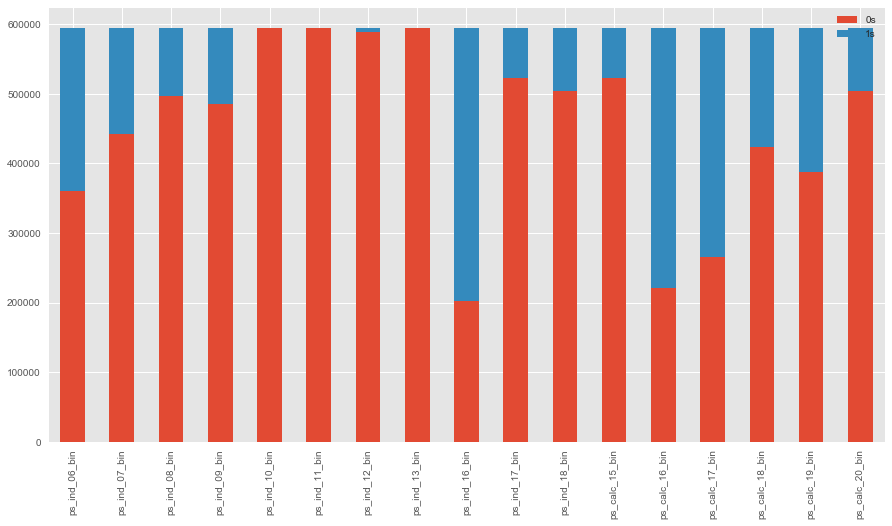

In [14]:
bin_distr_df = pd.DataFrame(index = bin_predictors,
                            columns = ['0s', '1s'] )
#bin_distr_df.apply(lambda x: (train_df[bin_predictors] == 0).sum(), axis=0)
bin_distr_df['0s'] = (train_df[bin_predictors] == 0).sum()
bin_distr_df['1s'] = (train_df[bin_predictors] == 1).sum()

bin_distr_df.plot(kind = 'bar', stacked = True, figsize = (15,8))

It appears there is no or less signal in the columns ending with 10_bin, 11_bin, 12_bin and 13_bin.

## Categorical variables analysis

In [15]:
cat_predictors = list(train_df[train_df.columns[
    train_df.columns.to_series().str.contains('_cat')]])

# Ensure that we have only Categorical predictors
train_df[cat_predictors].head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,-1,0,1,4,1,0,0,1,12
1,1,0,0,11,1,-1,0,-1,11,1,1,2,1,19
2,4,1,0,7,1,-1,0,-1,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,-1,0,-1,14,1,1,2,1,82


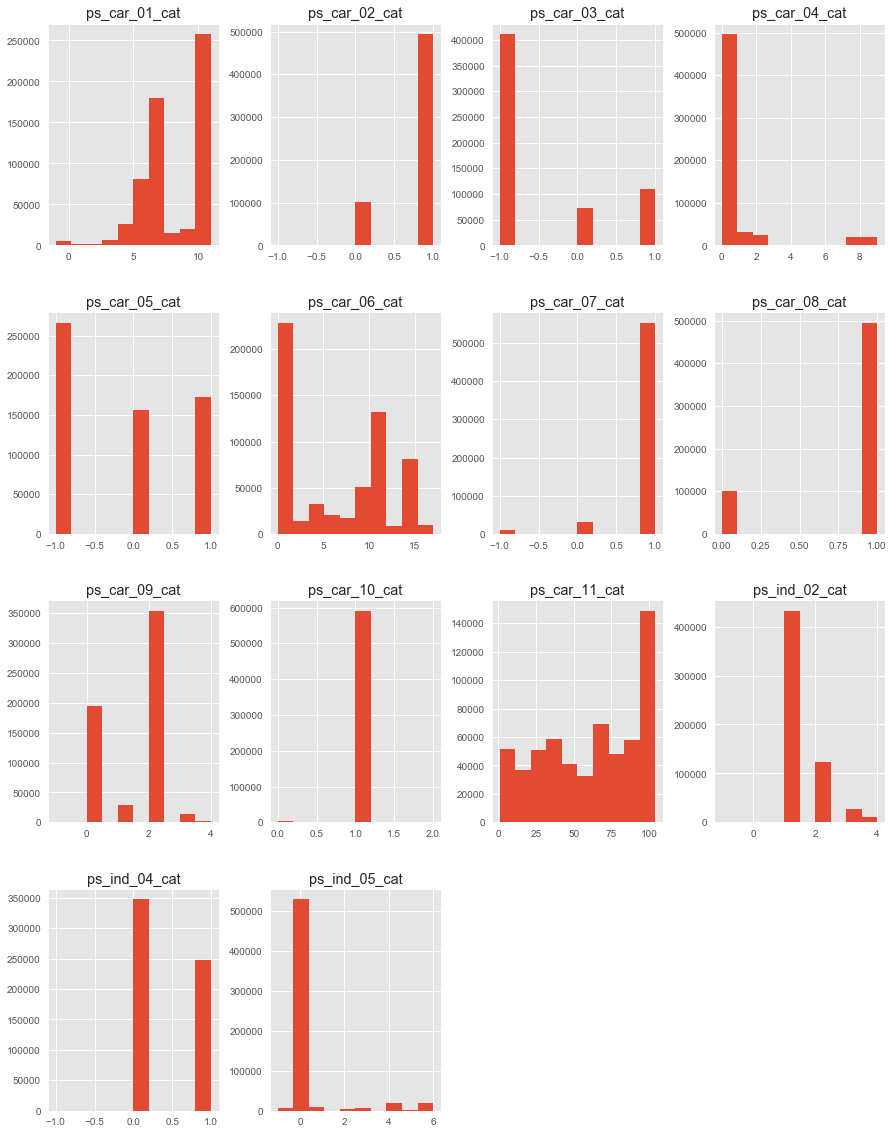

In [16]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_df[cat_predictors].hist(ax = ax)
plt.show()

The above graphs state:
1. ps_car_03_cat > 400,000
2. ps_car_05_cat > 250,000
3. ps_car_07_cat < 10000 (opportunity to impute)

The columns ps_car_03_cat and ps_car_05_cat may not be included for modeling 

## Dataset description

In [17]:
rem_predictors = list(set(train_df.columns) - set(cat_predictors) - set(bin_predictors) - set(['target']))
train_df[rem_predictors].head()

,ps_calc_10,ps_calc_04,ps_calc_09,ps_calc_03,ps_car_12,ps_ind_14,ps_reg_03,ps_calc_01,ps_car_15,ps_calc_13,...,ps_ind_01,ps_calc_07,ps_car_13,ps_ind_03,ps_reg_01,ps_calc_06,ps_car_14,ps_calc_05,ps_ind_15,ps_calc_08
0,5,3,1,0.2,0.400000,0,0.718070,0.6,3.605551,5,...,2,1,0.883679,5,0.7,10,0.370810,1,11,10
1,7,2,1,0.3,0.316228,0,0.766078,0.3,2.449490,1,...,1,5,0.618817,7,0.8,9,0.388716,1,3,8
2,7,2,2,0.1,0.316228,0,-1.000000,0.5,3.316625,7,...,5,1,0.641586,9,0.0,9,0.347275,2,12,8
3,2,2,4,0.1,0.374166,0,0.580948,0.6,2.000000,4,...,0,1,0.542949,2,0.9,7,0.294958,4,8,8
4,12,2,2,0.0,0.316070,0,0.840759,0.4,2.000000,1,...,0,3,0.565832,0,0.7,6,0.365103,2,9,10


In [18]:
train_df[rem_predictors].describe()

,ps_calc_10,ps_calc_04,ps_calc_09,ps_calc_03,ps_car_12,ps_ind_14,ps_reg_03,ps_calc_01,ps_car_15,ps_calc_13,...,ps_ind_01,ps_calc_07,ps_car_13,ps_ind_03,ps_reg_01,ps_calc_06,ps_car_14,ps_calc_05,ps_ind_15,ps_calc_08
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,8.433590,2.372081,2.339034,0.449849,0.379945,0.012451,0.551102,0.449756,3.065899,2.872288,...,1.900378,3.005823,0.813265,4.423318,0.610991,7.689445,0.276256,1.885886,7.299922,9.225904
std,2.904597,1.117219,1.246949,0.287153,0.058327,0.127545,0.793506,0.287198,0.731366,1.694887,...,1.983789,1.414564,0.224588,2.699902,0.287643,1.334312,0.357154,1.134927,3.546042,1.459672
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250619,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,2.000000
25%,6.000000,2.000000,1.000000,0.200000,0.316228,0.000000,0.525000,0.200000,2.828427,2.000000,...,0.000000,2.000000,0.670867,2.000000,0.400000,7.000000,0.333167,1.000000,5.000000,8.000000
50%,8.000000,2.000000,2.000000,0.500000,0.374166,0.000000,0.720677,0.500000,3.316625,3.000000,...,1.000000,3.000000,0.765811,4.000000,0.700000,8.000000,0.368782,2.000000,7.000000,9.000000
75%,10.000000,3.000000,3.000000,0.700000,0.400000,0.000000,1.000000,0.700000,3.605551,4.000000,...,3.000000,4.000000,0.906190,6.000000,0.900000,9.000000,0.396485,3.000000,10.000000,10.000000
max,25.000000,5.000000,7.000000,0.900000,1.264911,4.000000,4.037945,0.900000,3.741657,13.000000,...,7.000000,9.000000,3.720626,11.000000,0.900000,10.000000,0.636396,6.000000,13.000000,12.000000


## Correlation plot

### continuous variables

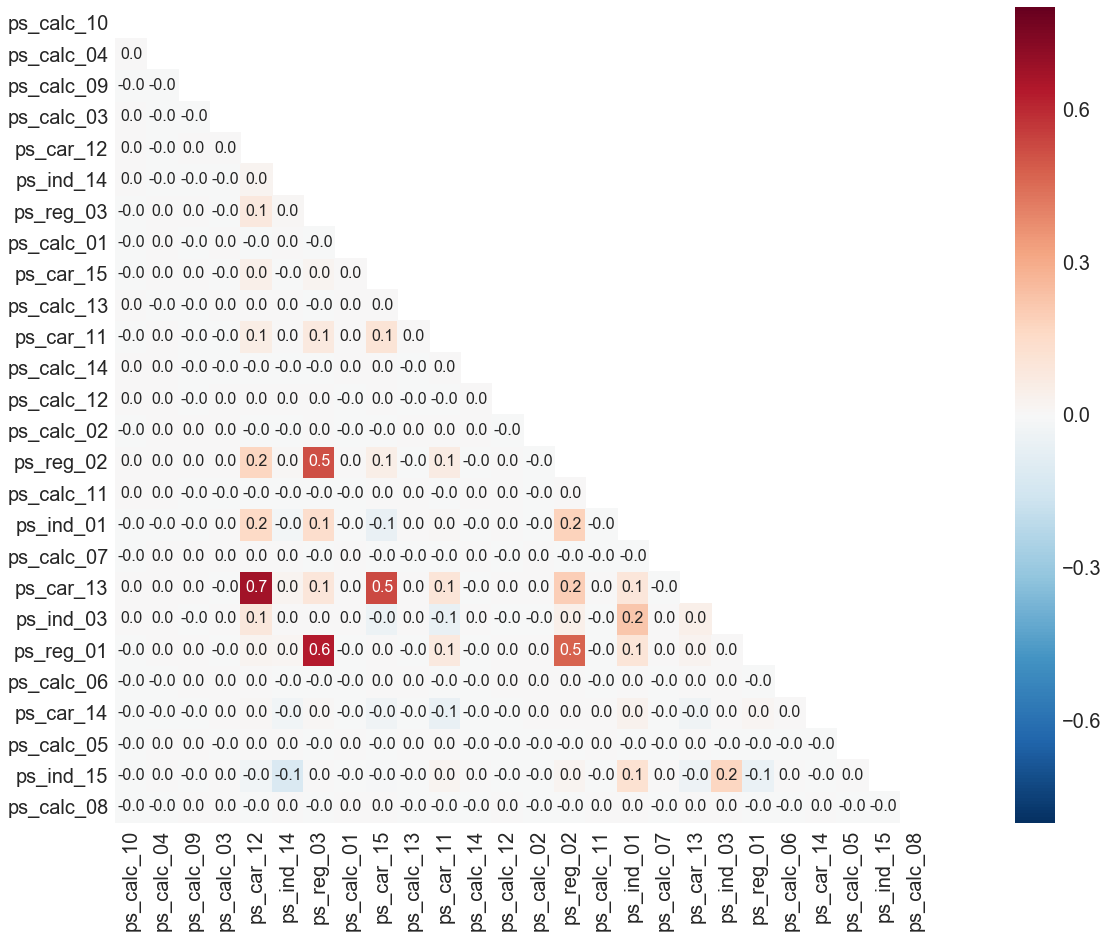

In [19]:
import seaborn as sns
import numpy as np
def heatplot(predictors):
    sns.set(font_scale=2)
    corr = train_df[predictors].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(30,15))  
        ax = sns.heatmap(
                corr, mask=mask, vmax=.8, square=True, annot=True,
                fmt=".1f",
                annot_kws={'size':16})

heatplot(rem_predictors)
sns.set(font_scale=1)

Only moderate correlation seen in 5 pairs of variables. No perfect correlation seen, and therefore no opportunity to eliminate few columns
1. ps_car_13 vs ps_reg_12
2. ps_car_13 vs ps_reg_15
3. ps_reg_03 vs ps_reg_02
4. ps_reg_03 vs ps_reg_01
5. ps_reg_01 vs ps_reg_02


### Binary variables

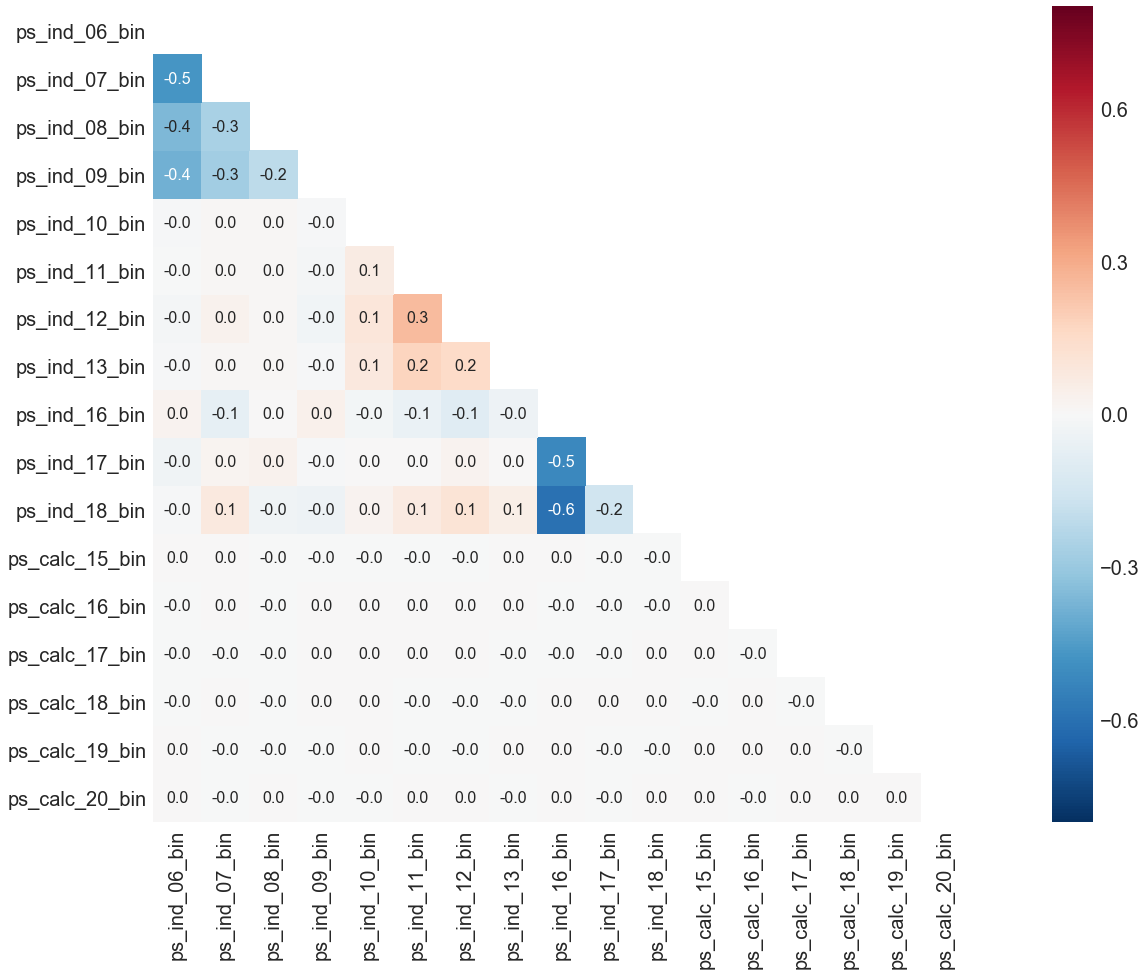

In [20]:
heatplot(bin_predictors)

Form predictors without missing values and check accuracy

In [22]:
def ginic(actual, pred):
    actual = np.asarray(actual) #In case, someone passes Series or list
    n = len(actual)
    a_s = actual[np.argsort(pred)]
    a_c = a_s.cumsum()
    giniSum = a_c.sum() / a_s.sum() - (n + 1) / 2.0
    return giniSum / n
 
def gini_normalizedc(a, p):
    if p.ndim == 2:#Required for sklearn wrapper
        p = p[:,1] #If proba array conta
    return ginic(a, p) / ginic(a, a)

Perform Logistics Regression with one hot encoding

In [23]:
#logreg = LogisticRegression(penalty='l2', C=0.1, class_weight='balanced')
#logreg.fit(X_train_enc, y_train)
#predictions_log = logreg.predict(X_dev_enc)
#print('Accuracy: ', metrics.accuracy_score(y_dev, predictions_log))
#predict_proba_log = logreg.predict_proba(X_dev_enc)
#print('Normalized Gini: ', gini_normalizedc(y_dev, predict_proba_log))

Perform Decision tree classifier

In [24]:
tree_clf = DecisionTreeClassifier(random_state=99)
tree_clf.fit(X_train, y_train)
#cross_val_score(tree_clf, X, y, cv=5)
predictions_tree = tree_clf.predict(X_dev)
print('Accuracy: ', metrics.accuracy_score(y_dev, predictions_tree))
predict_proba_tree = tree_clf.predict_proba(X_dev)
print('Normalized Gini: ', gini_normalizedc(y_dev, predict_proba_tree))

Accuracy:  0.919247666809
Normalized Gini:  0.00733061682164


Perform Random forest classifier

In [25]:
def RandForest(
               p_X_train, 
               p_y_train,
               p_X_dev,
               p_y_dev
              ):
    forest = RandomForestClassifier(100, n_jobs = -1, min_samples_leaf = 100, random_state=99)
    forest.fit(p_X_train, p_y_train)
    predictions_forest = forest.predict(p_X_dev)
    print('Accuracy: ', metrics.accuracy_score(p_y_dev, predictions_forest))
    predict_proba_forest = forest.predict_proba(p_X_dev)
    print('Normalized Gini: ', gini_normalizedc(p_y_dev, predict_proba_forest))
    print(metrics.confusion_matrix(p_y_dev, predictions_forest))
    return forest

forest = RandForest(
            X_train, 
            y_train,
            X_dev,
            y_dev
          )

Accuracy:  0.964097006964
Normalized Gini:  0.267820592998
[[114769      0]
 [  4274      0]]


In [26]:
feature_importance = pd.DataFrame([feature for feature in zip(X_train.columns, 
                                   forest.feature_importances_)], columns=['feature', 'feature importance'])
feature_importance.sort_values(by='feature importance', ascending=False)

,feature,feature importance
34,ps_car_13,0.085814
20,ps_reg_03,0.067142
35,ps_car_14,0.046532
2,ps_ind_03,0.040528
31,ps_car_11_cat,0.035122
14,ps_ind_15,0.034946
4,ps_ind_05_cat,0.034885
19,ps_reg_02,0.032580
36,ps_car_15,0.027091
37,ps_calc_01,0.026430


In [27]:
restr_predictors = feature_importance[feature_importance.loc[:,'feature importance'] > .0002]['feature'].reset_index(drop=True)
restr_predictors

0          ps_ind_01
1      ps_ind_02_cat
2          ps_ind_03
3      ps_ind_04_cat
4      ps_ind_05_cat
5      ps_ind_06_bin
6      ps_ind_07_bin
7      ps_ind_08_bin
8      ps_ind_09_bin
9      ps_ind_12_bin
10         ps_ind_14
11         ps_ind_15
12     ps_ind_16_bin
13     ps_ind_17_bin
14     ps_ind_18_bin
15         ps_reg_01
16         ps_reg_02
17         ps_reg_03
18     ps_car_01_cat
19     ps_car_02_cat
20     ps_car_03_cat
21     ps_car_04_cat
22     ps_car_05_cat
23     ps_car_06_cat
24     ps_car_07_cat
25     ps_car_08_cat
26     ps_car_09_cat
27     ps_car_11_cat
28         ps_car_11
29         ps_car_12
30         ps_car_13
31         ps_car_14
32         ps_car_15
33        ps_calc_01
34        ps_calc_02
35        ps_calc_03
36        ps_calc_04
37        ps_calc_05
38        ps_calc_06
39        ps_calc_07
40        ps_calc_08
41        ps_calc_09
42        ps_calc_10
43        ps_calc_11
44        ps_calc_12
45        ps_calc_13
46        ps_calc_14
47    ps_calc

In [28]:
missing_val_summary.sort_values('Percentage', ascending = False)

,Percentage
ps_car_03_cat,69.08984
ps_car_05_cat,44.78253
ps_reg_03,18.10649
ps_car_14,7.16047
ps_car_07_cat,1.93024
ps_ind_05_cat,0.97595
ps_car_09_cat,0.09560
ps_ind_02_cat,0.03629
ps_car_01_cat,0.01798
ps_ind_04_cat,0.01394


In [29]:
excl_predictors = [
                   'ps_ind_10_bin', 
                   'ps_ind_11_bin', 
                   'ps_ind_13_bin', # No signal
                   'ps_car_03_cat', 
                   'ps_car_05_cat'  # These variables have too many missing values
                  ]


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Imputing 
ps_reg_03, ps_car_14, ps_car_07_cat
ps_ind_05_cat, ps_car_09_cat, ps_ind_02_cat,
ps_car_01_cat,ps_ind_04_cat, ps_car_02_cat, 
ps_car_11, ps_car_12

In [30]:
def impute(p_X_imp, p_intercept):
    # impute continuous variables with median
    p_X_imp['ps_car_12'].replace([-1], p_X_imp['ps_car_12'].median(), inplace=True)
#    print((p_X_imp['ps_car_12'] == -1).sum())
    
    p_X_imp['ps_car_11'].replace([-1], p_X_imp['ps_car_11'].median(), inplace = True)
#    print((p_X_imp['ps_car_11'] == -1).sum())
    
    p_X_imp.loc[p_X_imp.ps_reg_03 == -1, 'ps_reg_03'] = \
     (p_X_imp.loc[p_X_imp.ps_reg_03 == -1, 'ps_reg_01'] * regr.coef_[0][0]) + \
        (p_X_imp.loc[p_X_imp.ps_reg_03 == -1, 'ps_reg_02'] * regr.coef_[0][1] + \
            p_intercept) 
    
#    print((p_X_imp['ps_reg_03'] == -1).sum())
    
    p_X_imp['ps_ind_02_cat'].replace([-1], p_X_imp['ps_ind_02_cat'].mode(), inplace = True)
#    print((p_X_imp['ps_ind_02_cat'] == -1).sum())
    
    p_X_imp['ps_ind_04_cat'].replace([-1], p_X_imp['ps_ind_04_cat'].mode(), inplace = True)
#    print((p_X_imp['ps_ind_04_cat'] == -1).sum())
    
    p_X_imp['ps_ind_05_cat'].replace([-1], p_X_imp['ps_ind_05_cat'].mode(), inplace = True)
#    print((p_X_imp['ps_ind_05_cat'] == -1).sum())
    
    p_X_imp['ps_car_07_cat'].replace([-1], p_X_imp['ps_car_07_cat'].mode(), inplace = True)
#    print((p_X_imp['ps_car_07_cat'] == -1).sum())
    
    p_X_imp['ps_car_09_cat'].replace([-1], p_X_imp['ps_car_09_cat'].mode(), inplace = True)
#    print((p_X_imp['ps_car_09_cat'] == -1).sum())

    
    
    return p_X_imp
    
    





In [31]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                '%.2f%%' % (100 * height * height/train_df.shape[0]),
                ha='center', va='bottom')
        
def barcharts(l):
    sns.set(font_scale=1)
    for i in l:
        ind_df_0 = train_df.loc[train_df.target==0,[i, 'target']]
        ind_df_1 = train_df.loc[train_df.target==1,[i, 'target']]
        nonClaims = np.sqrt(ind_df_0[i].value_counts())
        Claims = np.sqrt(ind_df_1[i].value_counts())
        ind = np.arange(len(ind_df_1[i].value_counts().index)) # the x locations for the groups
        width = 0.35       # the width of the bars: can also be len(x) sequence
        if len(ind) > 5:
            fig, ax = plt.subplots(figsize = (15,10))
        else:
            fig, ax = plt.subplots()        
        p1 = plt.bar(ind, nonClaims, width, color='#d62728')
        #p2 = plt.bar(ind, Claims, width, bottom=nonClaims)
        p2 = plt.bar(ind + width, Claims, width)

        plt.ylabel('Value counts Sq. root')
        plt.title(i + ' distribution')
        plt.xticks(ind, ind_df_1[i].value_counts().index)
        #plt.yticks(np.arange(0, 10, 1))
        plt.legend((p1[0], p2[0]), ('Non claims', 'Claims'))
        autolabel(p1,ax)
        autolabel(p2,ax)
        plt.show()



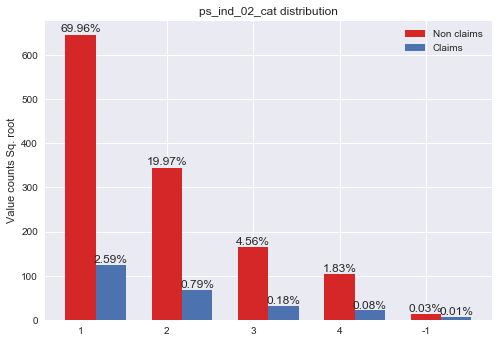

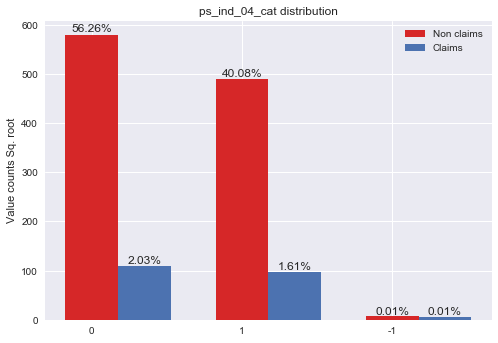

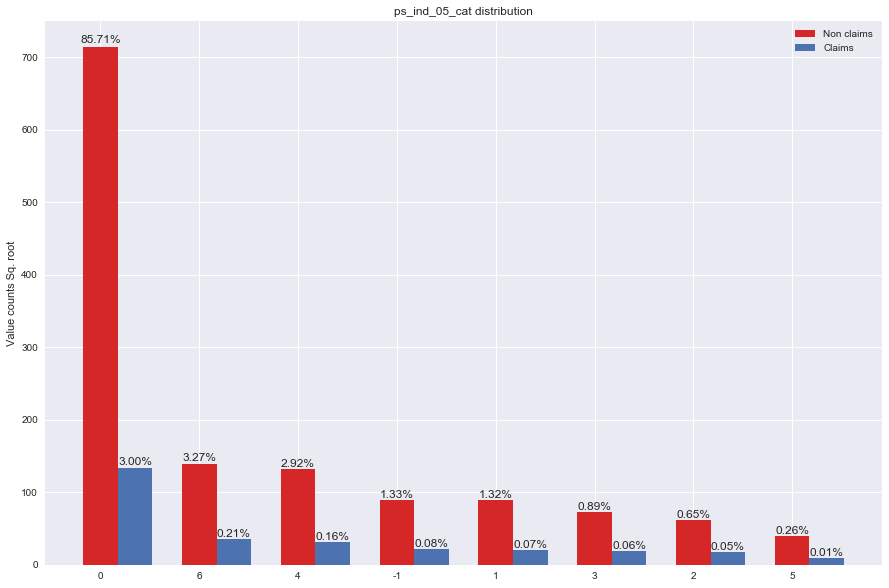

In [32]:
# Create bar charts

l = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat']
barcharts(l)

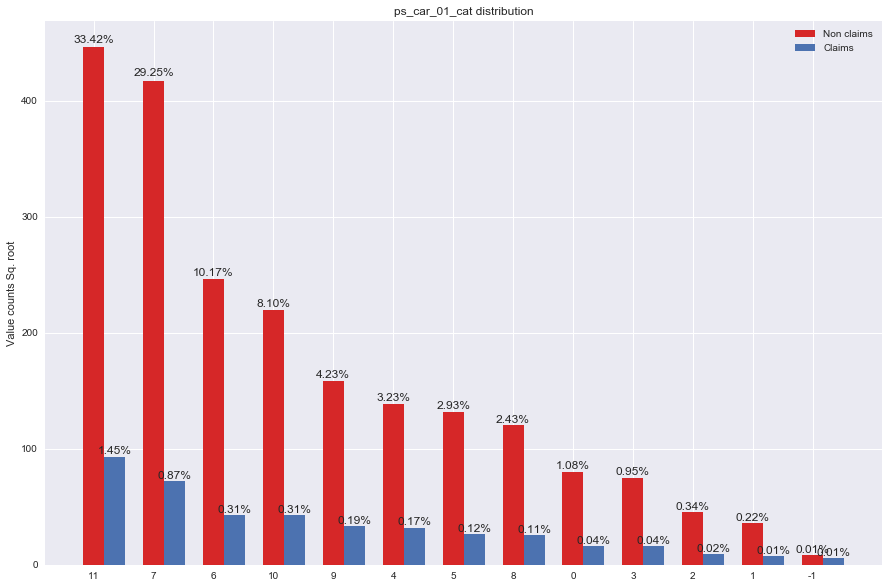

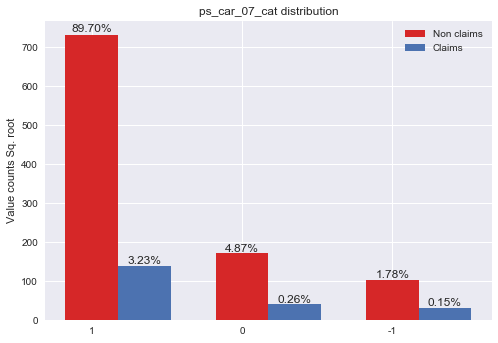

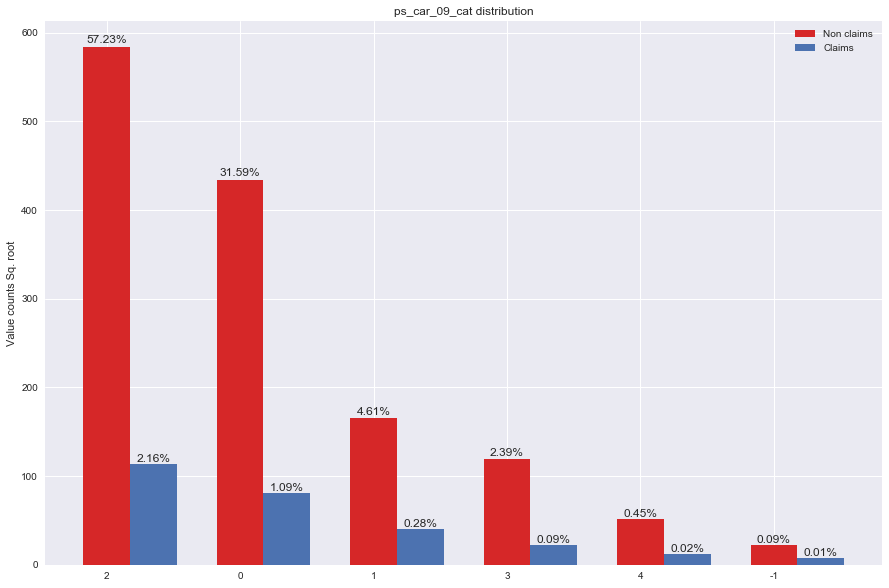

In [33]:
# Create bar charts
l = ['ps_car_01_cat', 'ps_car_07_cat', 'ps_car_09_cat']
barcharts(l)

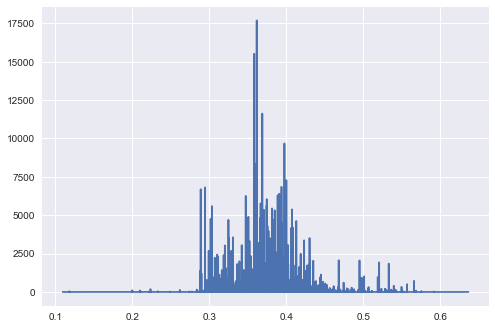

In [34]:
from scipy.interpolate import UnivariateSpline


N = train_df.shape[0]
n = int(N/10)
s = (train_df.loc[train_df.ps_car_14 != -1, ['ps_car_14']])['ps_car_14']   # generate your data sample with N elements
p, x = np.histogram(s, bins=n) # bin it into n = N/10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.plot(x, f(x))
plt.show()

Perform linear regression to impute ps_reg_03 as it is correlated with other variables ps_reg_02 and ps_reg_02

In [35]:
# Remove the rows with ps_reg_03 as -1
X_imp = train_df.copy(deep=True)
y_imp = X_imp.pop('target')
X_imp = X_imp.loc[X_imp.ps_reg_03 != -1, list(X_imp.columns)]
y_imp = y[X_imp.index]

print((X_imp['ps_reg_03'] == -1).sum())


X_train_imp, X_dev_imp, y_train_imp, y_dev_imp = train_test_split(
    X_imp, y[X_imp.index], train_size = 0.8, test_size = 0.2, random_state=99)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
train_x = X_train_imp.filter(['ps_reg_01', 'ps_reg_02'], axis=1)
train_y = X_train_imp.filter(['ps_reg_03'], axis=1)
dev_x   = X_dev_imp.filter(['ps_reg_01', 'ps_reg_02'], axis=1)
dev_y   = X_dev_imp.filter(['ps_reg_03'], axis=1)

regr.fit(train_x, train_y)

# Make predictions using the testing set
y_pred = regr.predict(dev_x)

# The coefficients
print('Coefficients: \n', regr.coef_ )
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(dev_y, y_pred))



0
Coefficients: 
 [[-0.21839436  0.65479495]]
Mean squared error: 0.05


Check the 3d plot of these 3 variables

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

n = X_imp.shape[0]
c = list(map((lambda x: 'g' if x==0 else 'r' ), y_imp))


ax.scatter(
     xs = X_imp.ps_reg_01, 
     ys = X_imp.ps_reg_02, 
     zs = X_imp.ps_reg_03, 
     c=c,
     edgecolor = 'black')

ax.set_xlabel('PS_REG_01')
ax.set_ylabel('PS_REG_02')
ax.set_zlabel('PS_REG_03')

plt.show()

In [36]:
# with -1 removed
RandForest(
            X_train_imp, 
            y_train_imp,
            X_dev_imp,
            y_dev_imp
          )

# with -1 present
X_imp = train_df.copy(deep=True)
y_imp = X_imp.pop('target')
X_train_imp, X_dev_imp, y_train_imp, y_dev_imp = train_test_split(
    X_imp, y[X_imp.index], train_size = 0.8, test_size = 0.2, random_state=99)
RandForest(
            X_train_imp, 
            y_train_imp,
            X_dev_imp,
            y_dev_imp
          )

# with imputation
X_imp = train_df.copy(deep=True)
y_imp = X_imp.pop('target')
X_imp = impute(X_imp, regr.intercept_[0])
X_train_imp, X_dev_imp, y_train_imp, y_dev_imp = train_test_split(
    X_imp, y[X_imp.index], train_size = 0.8, test_size = 0.2, random_state=99)
RandForest(
            X_train_imp, 
            y_train_imp,
            X_dev_imp,
            y_dev_imp
          )

Accuracy:  0.96184145741
Normalized Gini:  0.251669414239
[[93768     0]
 [ 3720     0]]
Accuracy:  0.964097006964
Normalized Gini:  0.267820592998
[[114769      0]
 [  4274      0]]
Accuracy:  0.964097006964
Normalized Gini:  0.268447948259
[[114769      0]
 [  4274      0]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=99,
            verbose=0, warm_start=False)

In [37]:
X_dev_imp.shape
y_dev_imp.shape
X_train_imp.shape
y_train_imp.shape
regr.intercept_

array([ 0.72607154])